In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

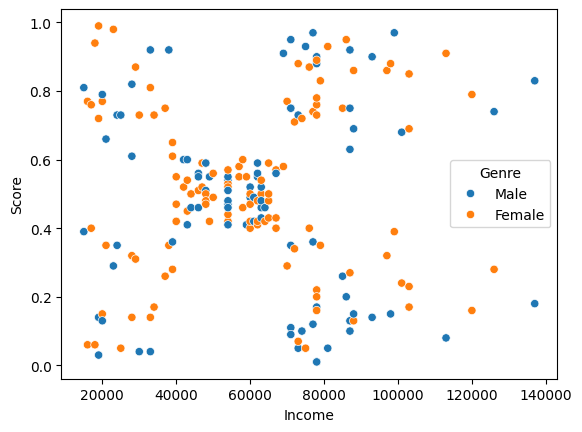

In [5]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [6]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

In [7]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [8]:
y_kmeans = k_means.labels_

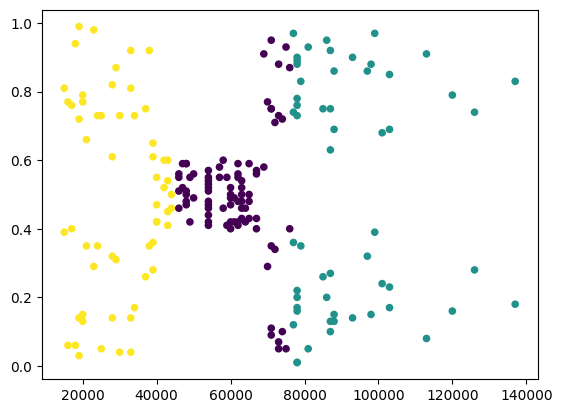

In [9]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')

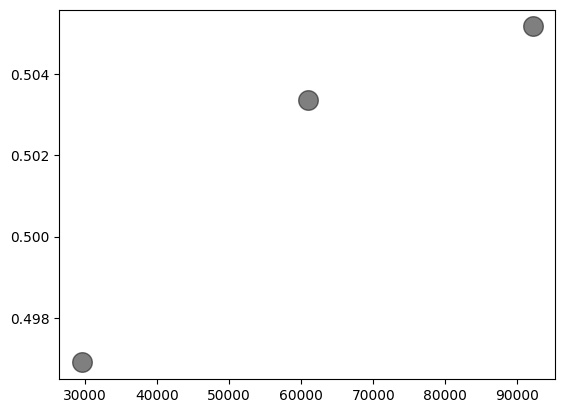

In [10]:
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

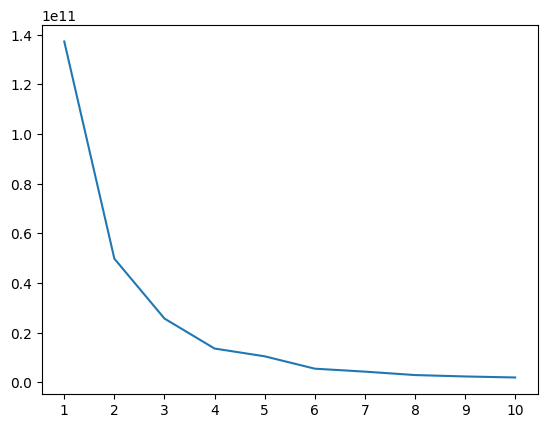

In [11]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

In [12]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)

In [13]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


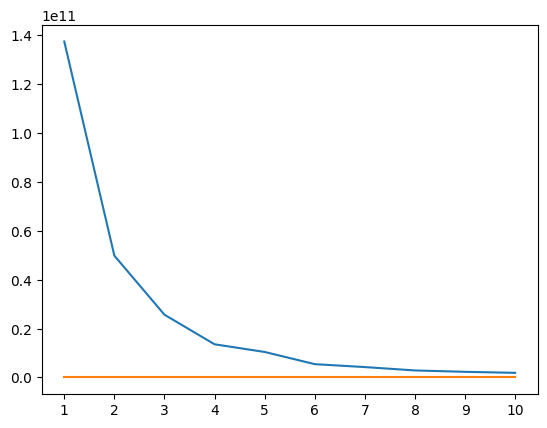

In [15]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

In [16]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [17]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [18]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)

In [19]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [20]:
from scipy.cluster.hierarchy import dendrogram

In [21]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

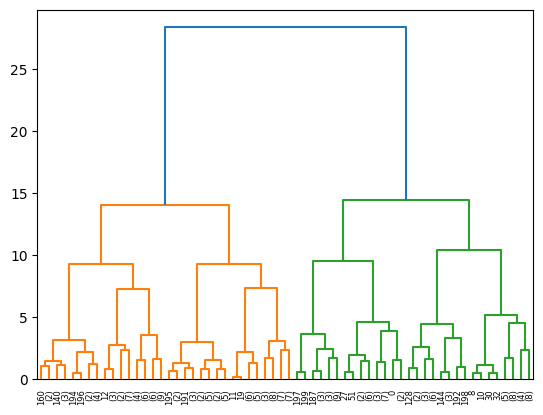

In [22]:
plot_dendrogram(model, truncate_mode="level", p=5)

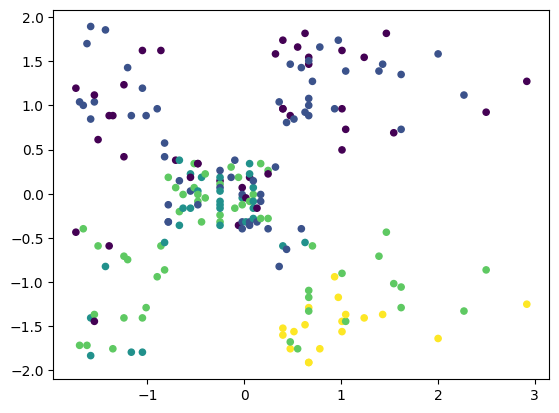

In [23]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

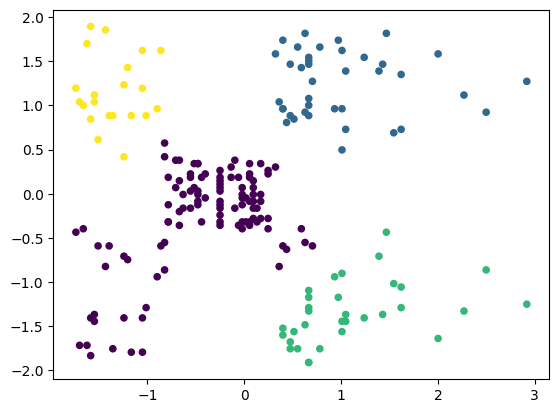

In [24]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

In [25]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [26]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

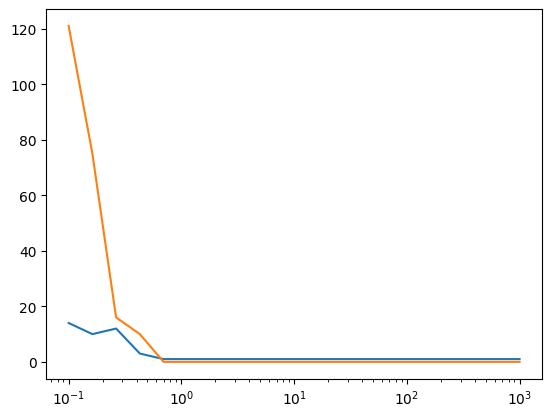

In [27]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

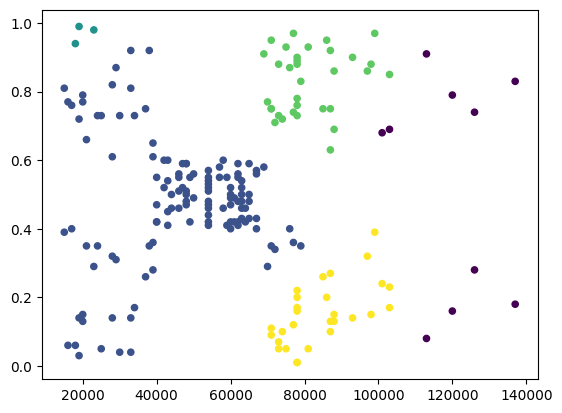

In [28]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

## 1. Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.

In [ ]:
df['Cluster_Kmeans'] = k_means.labels_

In [ ]:
for cluster in sorted(df['Cluster_Kmeans'].unique()):
    print(f"\nCluster {cluster} (K-means):")
    print(df[df['Cluster_Kmeans'] == cluster].head(3))


Cluster 0 (K-means):
    CustomerID   Genre  Age  Income  Score  Cluster_Kmeans
43          44  Female   31   39000   0.61               0
46          47  Female   50   40000   0.55               0
47          48  Female   27   40000   0.47               0

Cluster 1 (K-means):
     CustomerID   Genre  Age  Income  Score  Cluster_Kmeans
123         124    Male   39   69000   0.91               1
125         126  Female   31   70000   0.77               1
127         128    Male   40   71000   0.95               1

Cluster 2 (K-means):
   CustomerID   Genre  Age  Income  Score  Cluster_Kmeans
1           2    Male   21   15000   0.81               2
3           4  Female   23   16000   0.77               2
5           6  Female   22   17000   0.76               2

Cluster 3 (K-means):
     CustomerID   Genre  Age  Income  Score  Cluster_Kmeans
124         125  Female   23   70000   0.29               3
128         129    Male   59   71000   0.11               3
130         131    Male 

In [ ]:
df['Cluster_DBSCAN'] = y_db

In [ ]:
for cluster in sorted(df['Cluster_DBSCAN'].unique()):
    if cluster == -1:
        print("\nNoise points (DBSCAN):")
    else:
        print(f"\nCluster {cluster} (DBSCAN):")
    print(df[df['Cluster_DBSCAN'] == cluster].head(3))


Noise points (DBSCAN):
     CustomerID   Genre  Age  Income  Score  Cluster_Kmeans  Cluster_DBSCAN
187         188    Male   28  101000   0.68               1              -1
191         192  Female   32  103000   0.69               1              -1
192         193    Male   33  113000   0.08               3              -1

Cluster 0 (DBSCAN):
   CustomerID   Genre  Age  Income  Score  Cluster_Kmeans  Cluster_DBSCAN
0           1    Male   19   15000   0.39               4               0
1           2    Male   21   15000   0.81               2               0
2           3  Female   20   16000   0.06               4               0

Cluster 1 (DBSCAN):
    CustomerID   Genre  Age  Income  Score  Cluster_Kmeans  Cluster_DBSCAN
7            8  Female   23   18000   0.94               2               1
11          12  Female   35   19000   0.99               2               1
19          20  Female   35   23000   0.98               2               1

Cluster 2 (DBSCAN):
     Customer

In [ ]:
print("\nMean values per cluster (K-means):")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].groupby('Cluster_DBSCAN').mean())


Mean values per cluster (K-means):
                CustomerID        Age         Income     Score
Cluster_DBSCAN                                                
-1              195.200000  35.200000  119600.000000  0.534000
 0               66.841270  40.396825   46158.730159  0.479921
 1               13.333333  31.000000   20000.000000  0.970000
 2              156.060606  32.727273   81060.606061  0.830000
 3              162.000000  41.250000   84464.285714  0.153214


In [ ]:
print("\nCluster statistics (K-means):")
print(df.groupby('Cluster_Kmeans').agg({
    'Age': ['mean', 'std'],
    'Genre': lambda x: x.mode()[0]
}))


Cluster statistics (K-means):
                      Age               Genre
                     mean        std <lambda>
Cluster_Kmeans                               
0               42.716049  16.447822   Female
1               32.692308   3.728650   Female
2               25.272727   5.257030   Female
3               41.114286  11.341676     Male
4               45.217391  13.228607   Female


## 2. Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.

Income vs Score

In [ ]:
df

,CustomerID,Genre,Age,Income,Score,Cluster_Kmeans,Cluster_DBSCAN
0,1,Male,19,15000,0.39,4,0
1,2,Male,21,15000,0.81,2,0
2,3,Female,20,16000,0.06,4,0
3,4,Female,23,16000,0.77,2,0
4,5,Female,31,17000,0.40,4,0
...,...,...,...,...,...,...,...
195,196,Female,35,120000,0.79,1,-1
196,197,Female,45,126000,0.28,3,-1
197,198,Male,32,126000,0.74,1,-1
198,199,Male,32,137000,0.18,3,-1


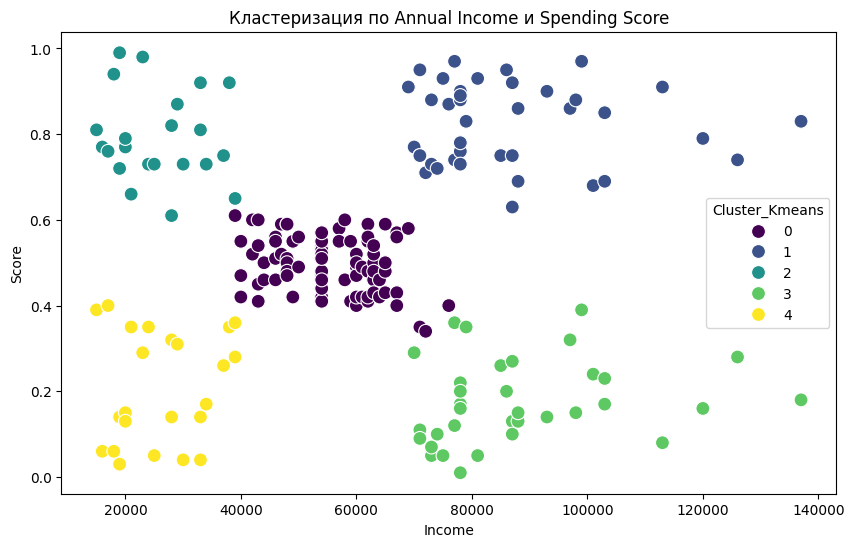

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Income',
    y='Score',
    hue='Cluster_Kmeans',
    data=df,
    palette='viridis',
    s=100
)
plt.title('Кластеризация по Annual Income и Spending Score')
plt.show()

Age vs Score

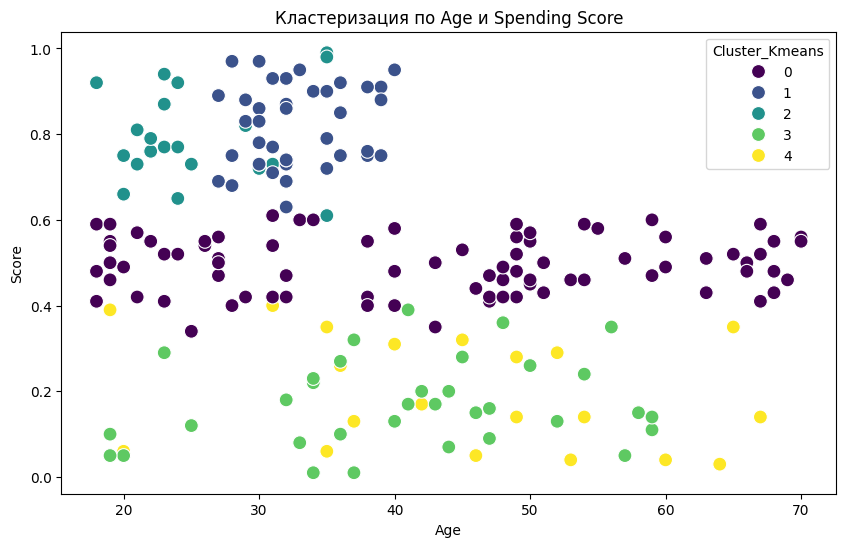

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Score',
    hue='Cluster_Kmeans',
    data=df,
    palette='viridis',
    s=100
)
plt.title('Кластеризация по Age и Spending Score')
plt.show()

Age vs Income

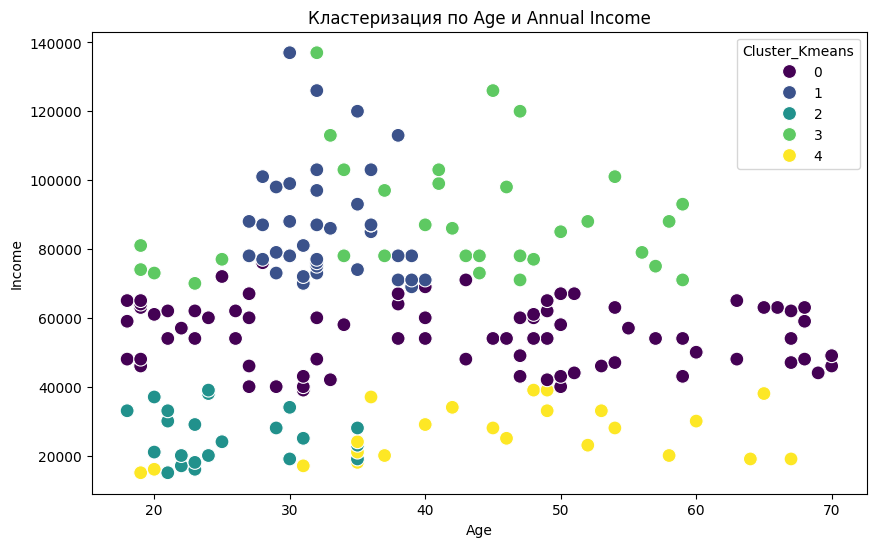

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Income',
    hue='Cluster_Kmeans',
    data=df,
    palette='viridis',
    s=100
)
plt.title('Кластеризация по Age и Annual Income')
plt.show()

## 3. Повторите весь анализ для другого датасета - кластеризации кредитных карт.

In [29]:
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('credit_card_clustering.csv')

In [ ]:
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [ ]:
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=np.number)),
                         columns=df.select_dtypes(include=np.number).columns)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed.drop(columns=['CustomerID'], errors='ignore'))
X_scaled = pd.DataFrame(X_scaled, columns=df_imputed.drop(columns=['CustomerID'], errors='ignore').columns)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

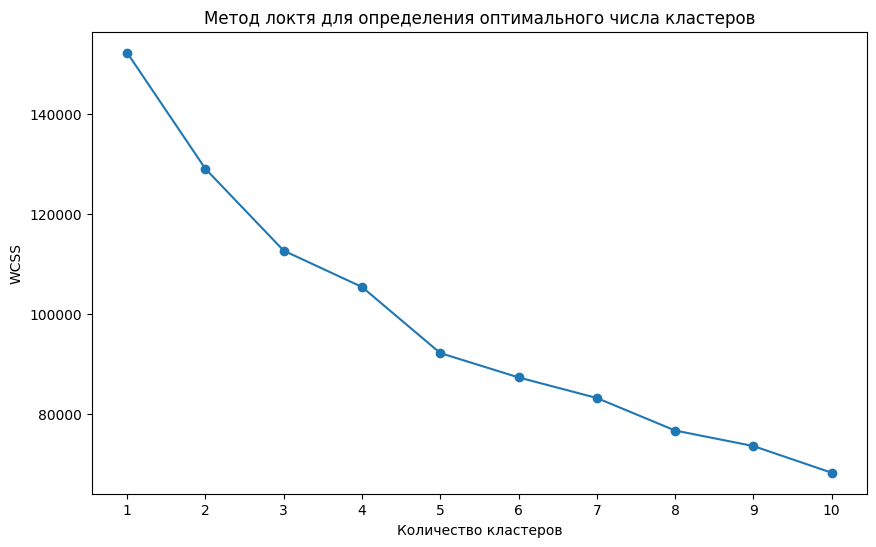

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df_imputed['Cluster_Kmeans'] = kmeans.labels_

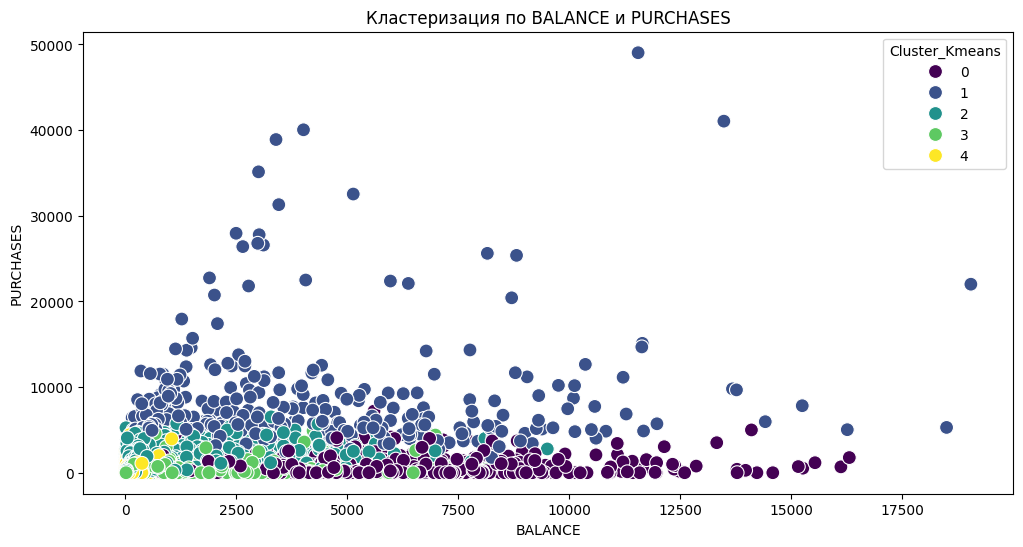

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Cluster_Kmeans',
               data=df_imputed, palette='viridis', s=100)
plt.title('Кластеризация по BALANCE и PURCHASES')
plt.show()

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

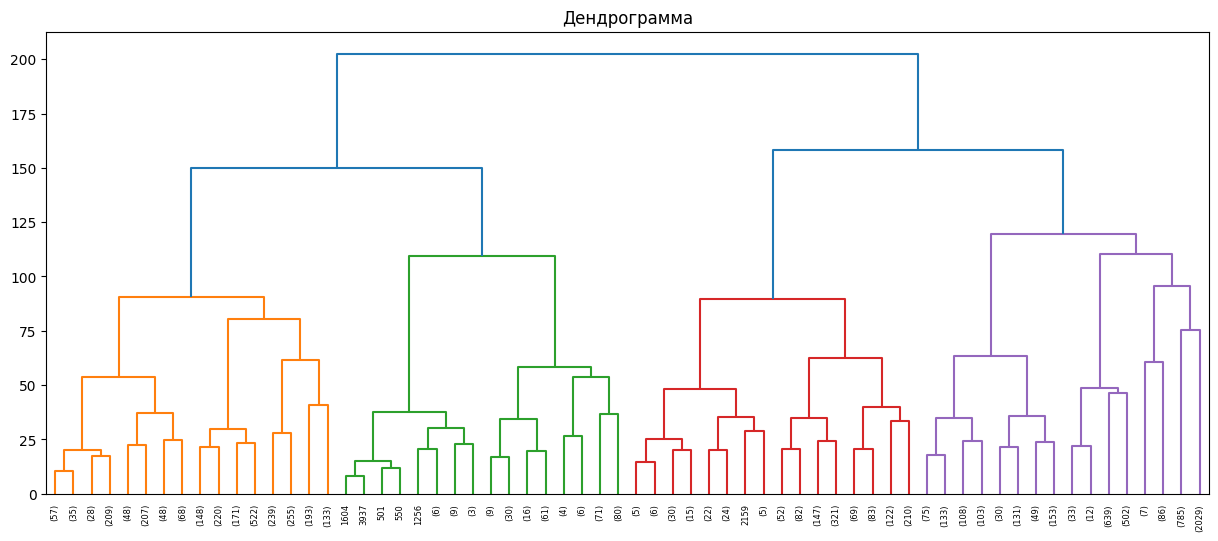

In [ ]:
plt.figure(figsize=(15, 6))
plot_dendrogram(model, truncate_mode='level', p=5)
plt.title('Дендрограмма')
plt.show()

In [ ]:
agg = AgglomerativeClustering(n_clusters=5)
df_imputed['Cluster_Agg'] = agg.fit_predict(X_scaled)

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5)
df_imputed['Cluster_DBSCAN'] = db.fit_predict(X_scaled)

In [ ]:
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise = list(db.labels_).count(-1)
print(f"\nDBSCAN: найдено {n_clusters} кластеров и {n_noise} выбросов")


DBSCAN: найдено 36 кластеров и 6624 выбросов


In [ ]:
print("\nСредние значения по кластерам (K-means):")
print(df_imputed.groupby('Cluster_Kmeans').mean())


Средние значения по кластерам (K-means):
                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster_Kmeans                                                                  
0               4903.428600           0.967095   553.101884        348.463283   
1               3588.990384           0.986874  7815.732886       5203.519089   
2                930.357741           0.962886  1299.705338        633.167216   
3               1526.118239           0.965743   255.461815        206.435714   
4                111.260364           0.381755   335.222822        199.440295   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster_Kmeans                                                              
0                           204.741611   4983.093638             0.313999   
1                          2613.732785    661.788641             0.944730   
2                           666.735496    226.754889             0.897121   
3    

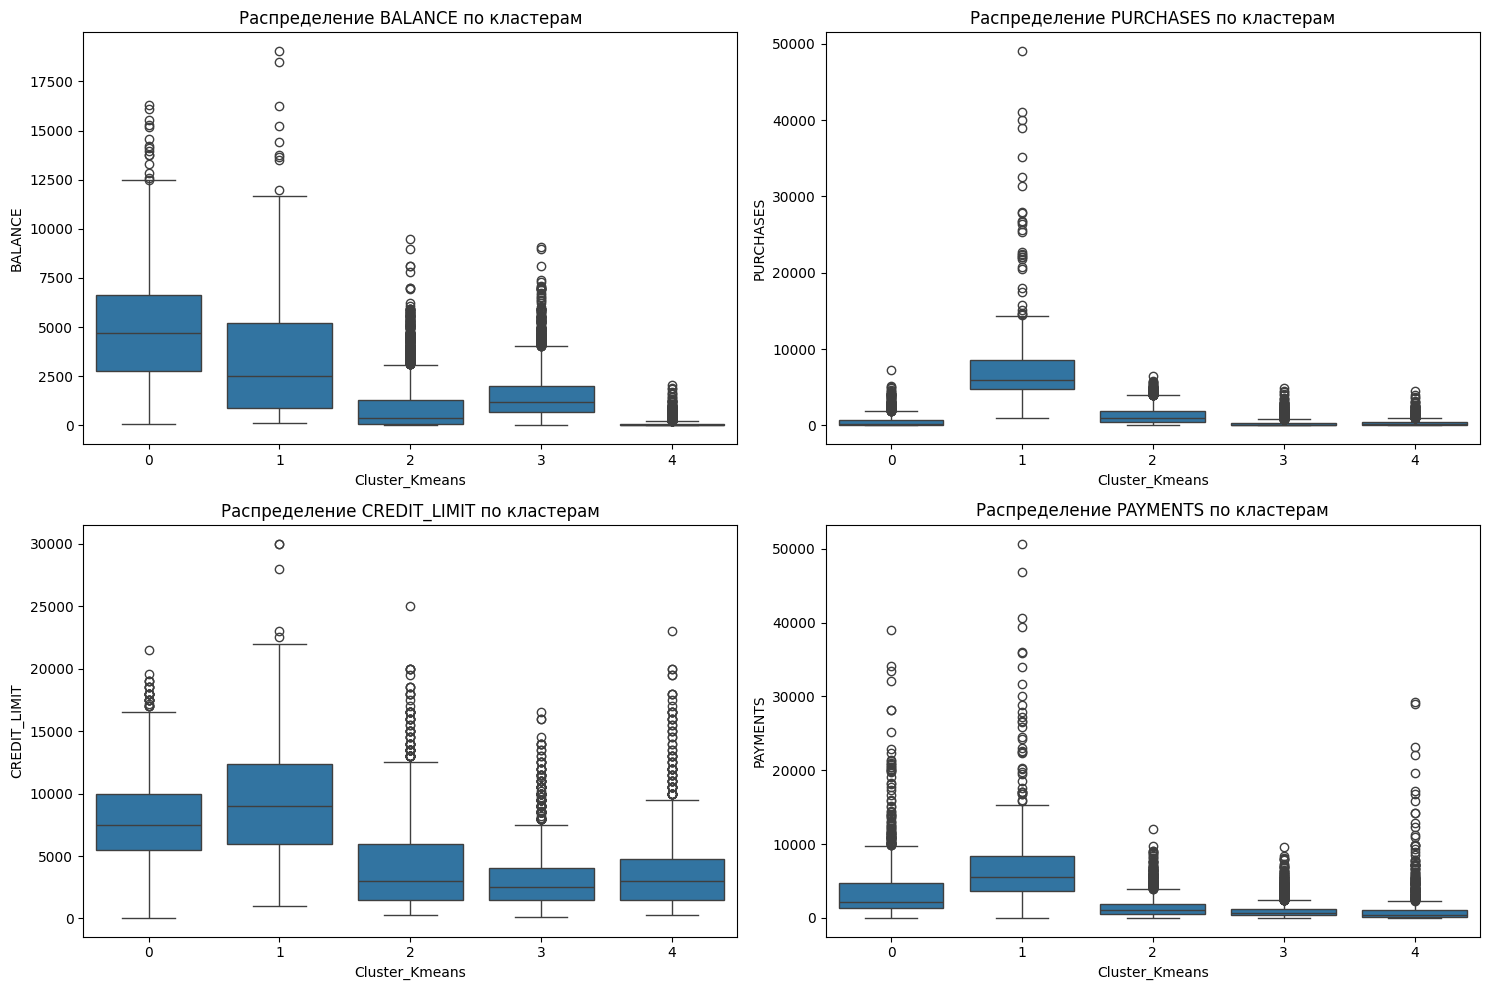

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster_Kmeans', y=column, data=df_imputed)
    plt.title(f'Распределение {column} по кластерам')
plt.tight_layout()
plt.show()

In [ ]:
comparison = pd.DataFrame({
    'KMeans': df_imputed['Cluster_Kmeans'],
    'Agglomerative': df_imputed['Cluster_Agg'],
    'DBSCAN': df_imputed['Cluster_DBSCAN']
})

In [ ]:
print("\nСравнение методов кластеризации:")
print(comparison.apply(pd.Series.value_counts))


Сравнение методов кластеризации:
     KMeans  Agglomerative  DBSCAN
-1      NaN            NaN    6624
 0    987.0         4093.0    1951
 1    395.0          300.0       8
 2   3164.0         1194.0      34
 3   3047.0         2581.0      11
 4   1357.0          782.0       6
 5      NaN            NaN       9
 6      NaN            NaN      13
 7      NaN            NaN      23
 8      NaN            NaN      14
 9      NaN            NaN       8
 10     NaN            NaN      60
 11     NaN            NaN       7
 12     NaN            NaN       8
 13     NaN            NaN       6
 14     NaN            NaN      23
 15     NaN            NaN      30
 16     NaN            NaN       5
 17     NaN            NaN       7
 18     NaN            NaN       5
 19     NaN            NaN       7
 20     NaN            NaN       5
 21     NaN            NaN       9
 22     NaN            NaN       5
 23     NaN            NaN       6
 24     NaN            NaN       5
 25     NaN          

## 4. В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.

In [30]:
from scipy.cluster.hierarchy import linkage

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.drop('CustomerID', errors='ignore')
X = df[numeric_cols].copy()

In [ ]:
X = X.replace([np.inf, -np.inf], np.nan)

In [ ]:
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
linkage_methods = ['single', 'complete', 'average', 'ward']

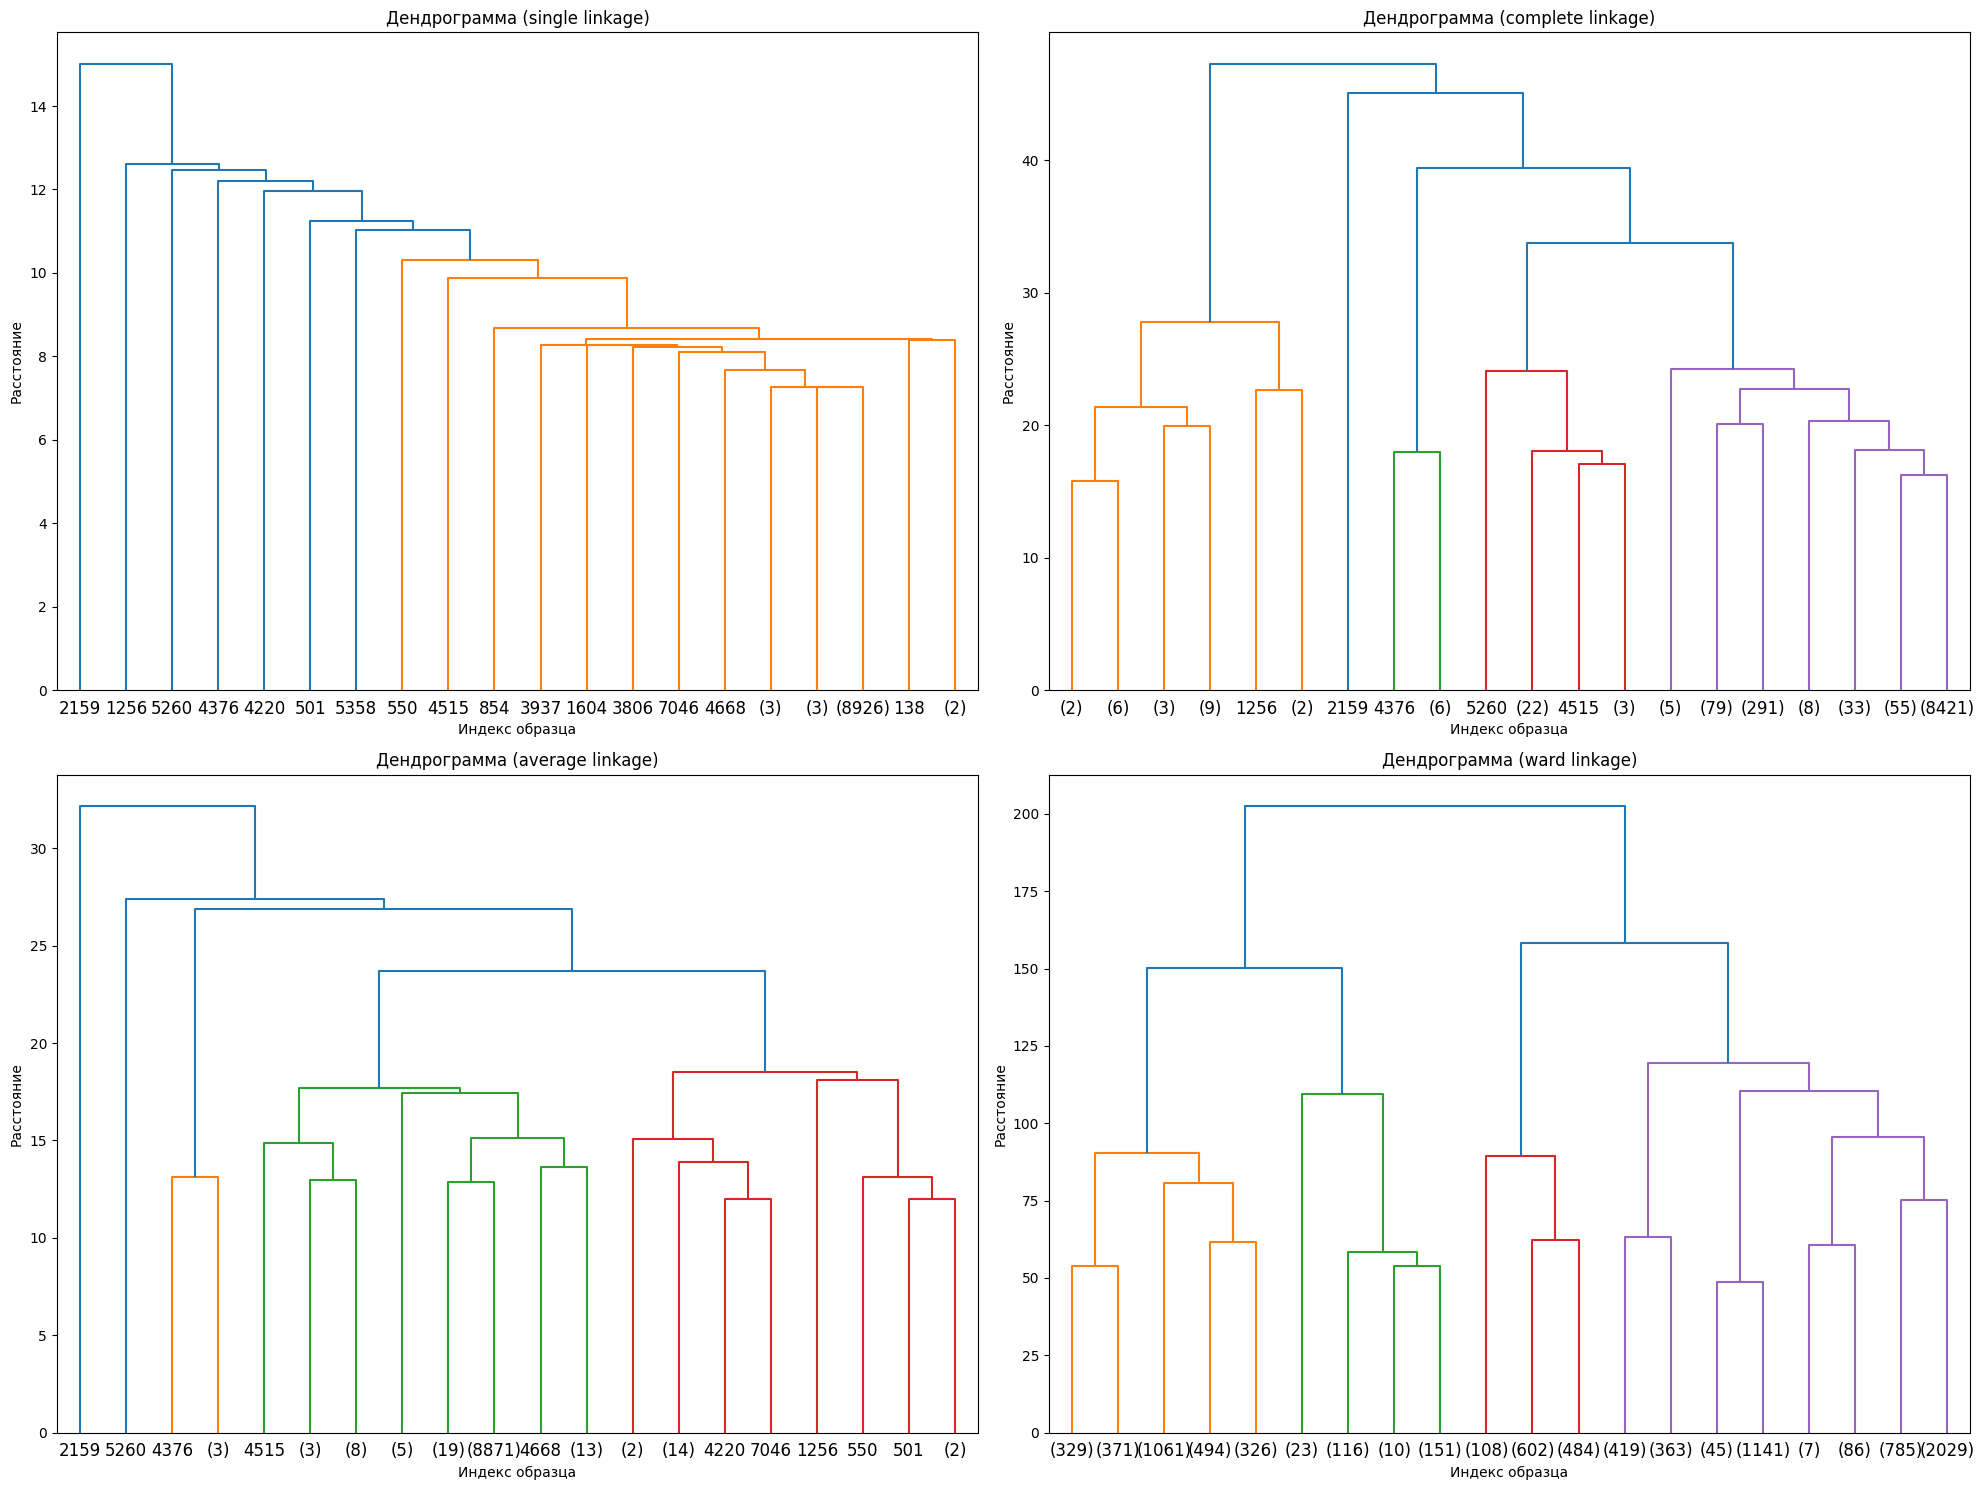

In [ ]:
plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods, 1):
    try:
        Z = linkage(X_scaled, method=method)

        plt.subplot(2, 2, i)
        dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True)
        plt.title(f'Дендрограмма ({method} linkage)')
        plt.xlabel('Индекс образца')
        plt.ylabel('Расстояние')
    except Exception as e:
        print(f"Ошибка при методе {method}: {str(e)}")

plt.tight_layout()
plt.show()

## 5. В задании на DBSCAN вычислите метрику WCSS и соотнесите результаты кластеризации через DBSCAN и К-средних.

In [31]:
from sklearn.metrics import pairwise_distances

In [ ]:
wcss_kmeans = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss_kmeans.append(kmeans.inertia_)

In [ ]:
print("WCSS для K-means:", wcss_kmeans)

WCSS для K-means: [152150.0000000004, 128953.36240712069, 112596.37091242989, 105339.67513964884, 92131.46554452999, 87266.6310722818, 83153.95039672032, 76655.409832772, 73554.47372048897, 68221.10748878564]


In [ ]:
def calculate_wcss_dbscan(X, labels):
    unique_labels = set(labels) - {-1}
    wcss = 0

    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)
            distances = pairwise_distances(cluster_points, [centroid], metric='euclidean')**2
            wcss += distances.sum()

    return wcss

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
wcss_dbscan = calculate_wcss_dbscan(X_scaled, dbscan_labels)
print(f"WCSS для DBSCAN: {wcss_dbscan:.2f}")

WCSS для DBSCAN: 9141.10


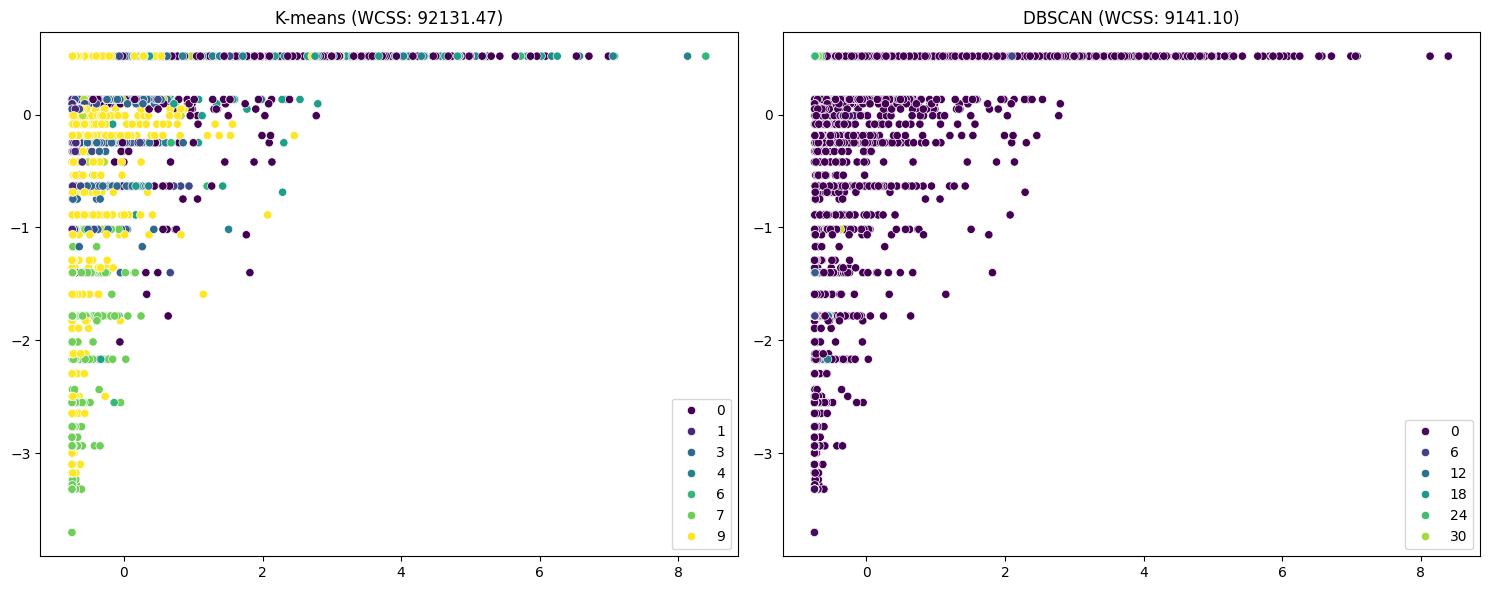

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title(f'K-means (WCSS: {wcss_kmeans[4]:.2f})')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title(f'DBSCAN (WCSS: {wcss_dbscan:.2f})')

plt.tight_layout()
plt.show()

In [ ]:
print(f"""
Результаты кластеризации:
----------------------------------
Метод            K-means     DBSCAN
----------------------------------
WCSS             {wcss_kmeans[4]:.1f}      {wcss_dbscan:.1f}
Кластеры         5           {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}
Выбросы          Нет         {list(dbscan_labels).count(-1)}
""")


Результаты кластеризации:
----------------------------------
Метод            K-means     DBSCAN
----------------------------------
WCSS             92131.5      9141.1
Кластеры         5           36
Выбросы          Нет         6624



## 6. Постройте кривые WCSS в зависимости от параметров DBSCAN.

In [32]:
from sklearn.neighbors import NearestNeighbors

In [43]:
def calculate_wcss(X, labels):
    unique_labels = set(labels)
    wcss = 0
    for label in unique_labels:
        if label == -1:
            continue
        cluster_points = X[labels == label]
        if len(cluster_points) > 0:
            center = cluster_points.mean(axis=0)
            wcss += ((cluster_points - center) ** 2).sum()
    return wcss

In [44]:
eps_values = np.logspace(-1, 1, 20)
wcss_values_eps = []
clusters_count_eps = []

In [45]:
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(X_flat)
    labels = db.labels_
    wcss_values_eps.append(calculate_wcss(X_flat, labels))
    clusters_count_eps.append(len(set(labels)) - (1 if -1 in labels else 0))

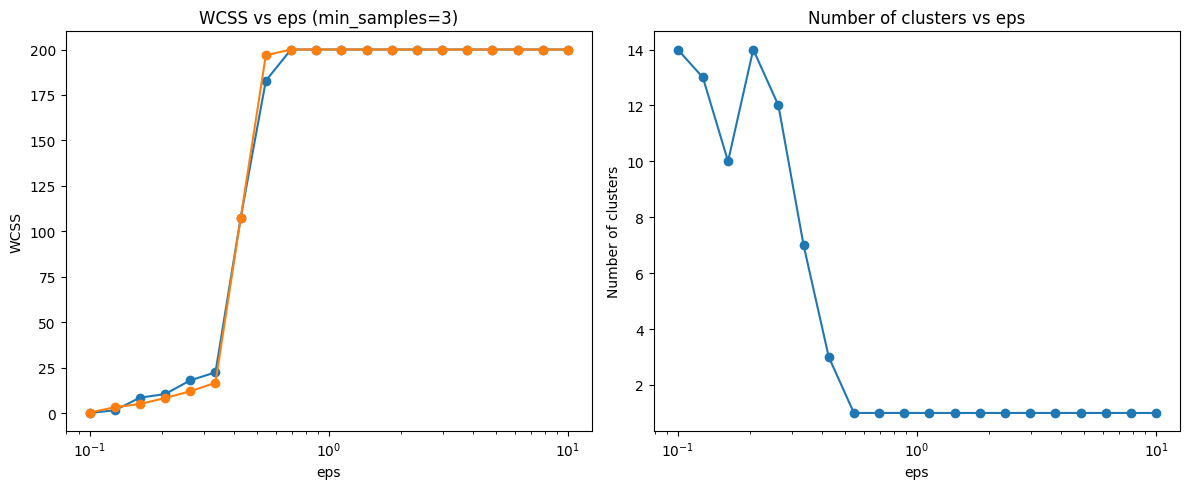

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eps_values, wcss_values_eps, marker='o')
plt.xscale('log')
plt.xlabel('eps')
plt.ylabel('WCSS')
plt.title('WCSS vs eps (min_samples=3)')

plt.subplot(1, 2, 2)
plt.plot(eps_values, clusters_count_eps, marker='o')
plt.xscale('log')
plt.xlabel('eps')
plt.ylabel('Number of clusters')
plt.title('Number of clusters vs eps')

plt.tight_layout()
plt.show()

In [47]:
min_samples_values = range(2, 20)
wcss_values_min_samples = []
clusters_count_min_samples = []

In [48]:
for min_samples in min_samples_values:
    db = DBSCAN(eps=0.4, min_samples=min_samples).fit(X_flat)
    labels = db.labels_
    wcss_values_min_samples.append(calculate_wcss(X_flat, labels))
    clusters_count_min_samples.append(len(set(labels)) - (1 if -1 in labels else 0))

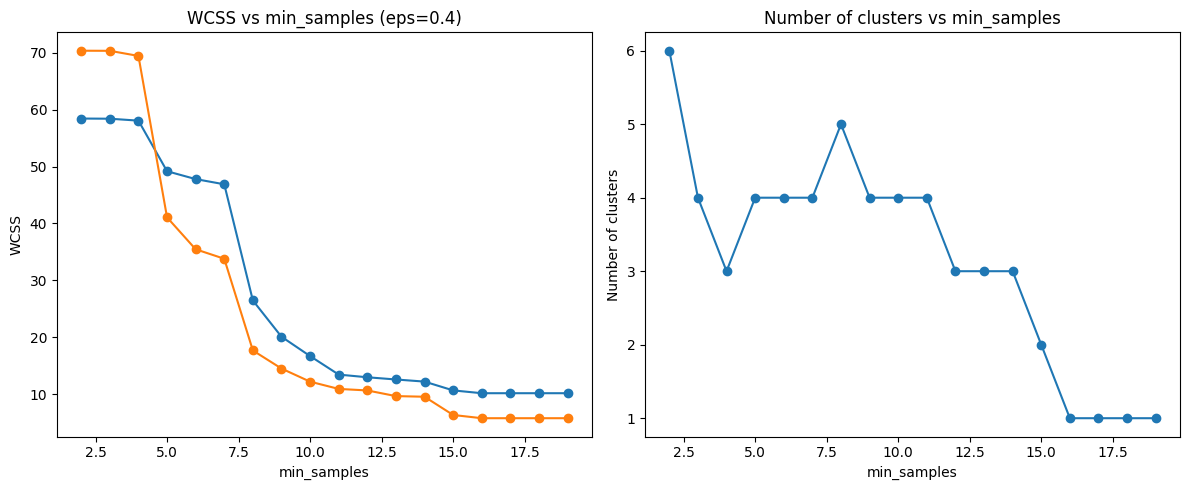

In [49]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(min_samples_values, wcss_values_min_samples, marker='o')
plt.xlabel('min_samples')
plt.ylabel('WCSS')
plt.title('WCSS vs min_samples (eps=0.4)')

plt.subplot(1, 2, 2)
plt.plot(min_samples_values, clusters_count_min_samples, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Number of clusters')
plt.title('Number of clusters vs min_samples')

plt.tight_layout()
plt.show()